In [1]:
from joblib import dump, load

In [2]:
x_train = load('x_train_rdkit.pkl')
x_test = load('x_test_rdkit.pkl')
x_valid = load('x_valid_rdkit.pkl')

In [3]:
y_train = load('y_train.pkl')
y_test = load('y_test.pkl')
y_valid = load('y_valid.pkl')

In [4]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [5]:
seed = 42

In [6]:
cv = StratifiedKFold(n_splits=10, random_state=seed)

D:\Anaconda3\envs\deepchem\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scale = StandardScaler().fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
x_valid_scaled = scale.transform(x_valid)

In [9]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [231]:
param_grid = {'n_estimators':np.arange(700, 860, 10)}

In [232]:
rf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=seed, max_features=94), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

In [233]:
rf.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   20.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=94,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                        

In [234]:
rf.best_params_

{'n_estimators': 750}

In [235]:
rf.best_score_

0.8

In [236]:
rf.cv_results_['mean_test_score']

array([0.79411765, 0.79705882, 0.79411765, 0.79705882, 0.79705882,
       0.8       , 0.79705882, 0.79705882, 0.79705882, 0.79705882,
       0.79411765, 0.79411765, 0.79411765, 0.79411765, 0.79411765,
       0.79411765])

In [237]:
rf.cv_results_['params']

[{'n_estimators': 700},
 {'n_estimators': 710},
 {'n_estimators': 720},
 {'n_estimators': 730},
 {'n_estimators': 740},
 {'n_estimators': 750},
 {'n_estimators': 760},
 {'n_estimators': 770},
 {'n_estimators': 780},
 {'n_estimators': 790},
 {'n_estimators': 800},
 {'n_estimators': 810},
 {'n_estimators': 820},
 {'n_estimators': 830},
 {'n_estimators': 840},
 {'n_estimators': 850}]

In [520]:
rf_2c8 = RandomForestClassifier(class_weight='balanced', random_state=seed, n_estimators=100, max_features=73)

In [521]:
rf_2c8.fit(x_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=73,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score, roc_auc_score, make_scorer, recall_score

In [136]:
matthews = make_scorer(matthews_corrcoef)
specificity = make_scorer(recall_score, pos_label=0)

In [522]:
cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean()

0.7794117647058824

In [523]:
cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring='roc_auc').mean()

0.871748120300752

In [524]:
cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring=matthews).mean()

0.5431791287712279

In [525]:
cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring='recall').mean()

0.8892105263157895

In [526]:
cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring=specificity).mean()

0.6238095238095238

In [527]:
y_pred = rf_2c8.predict(x_test_scaled)

In [528]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [529]:
accuracy_score(y_test, y_pred)

0.7663551401869159

In [530]:
roc_auc_score(y_test, rf_2c8.predict_proba(x_test_scaled)[:,1])

0.791019955654102

In [531]:
matthews_corrcoef(y_test, y_pred)

0.49659101342415307

In [532]:
recall_score(y_test, y_pred)

0.8484848484848485

In [533]:
recall_score(y_test, y_pred, pos_label=0)

0.6341463414634146

In [438]:
import matplotlib.pyplot as plt

0.7941176470588236 2
0.7663551401869159 1


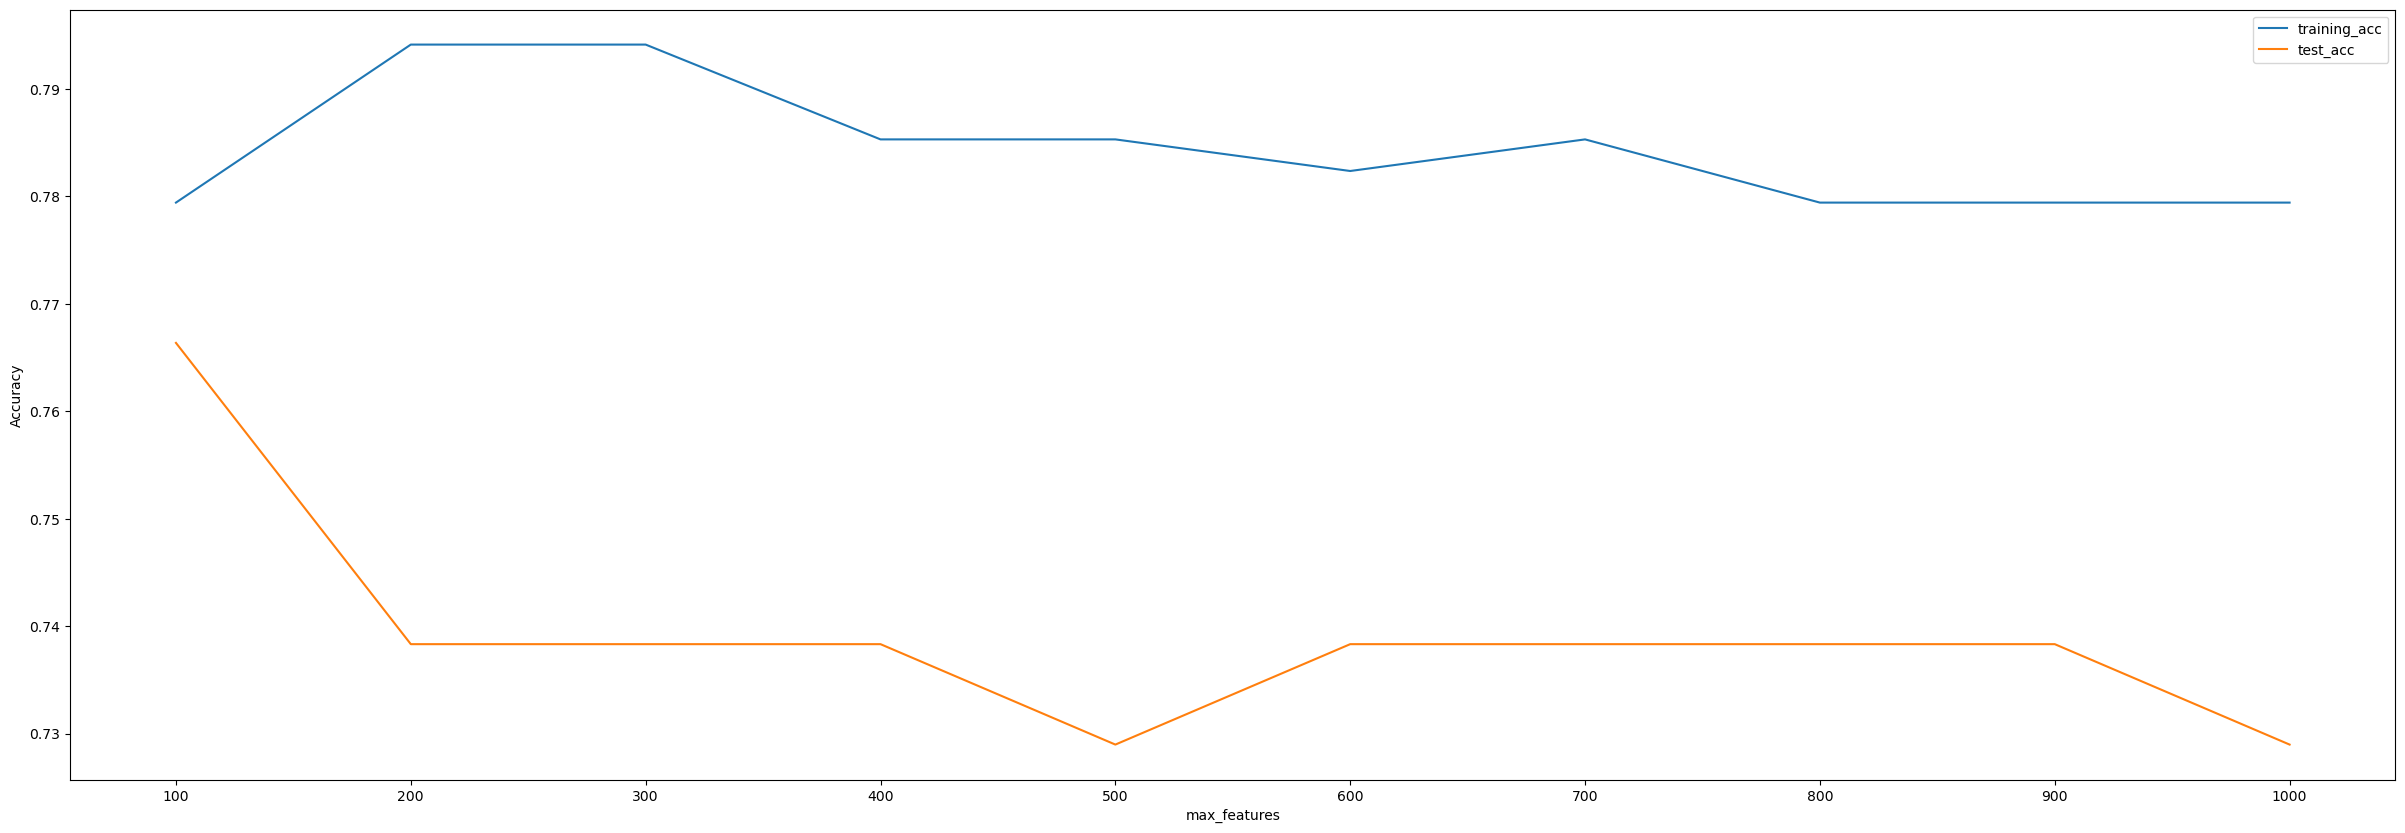

In [481]:
training_acc = []
test_acc = []

for i in np.arange(100, 1100, 100):
    rf_2c8 = RandomForestClassifier(class_weight='balanced', random_state=seed, n_estimators=i, max_features=73)
    rf_2c8.fit(x_train_scaled, y_train)
    training_acc.append(cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = rf_2c8.predict(x_test_scaled)
    test_acc.append(accuracy_score(y_test, y_pred))
print(max(training_acc),(training_acc.index(max(training_acc)))+1) # index starts from 0
print(max(test_acc),(test_acc.index(max(test_acc)))+1)
plt.figure(figsize=(30, 10))
plt.plot(np.arange(100, 1100, 100), training_acc, label="training_acc")
plt.plot(np.arange(100, 1100, 100), test_acc, label="test_acc")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
xticks = np.arange(100, 1100, 100)
plt.xticks(xticks)
plt.legend()

In [534]:
y_pred_valid = rf_2c8.predict(x_valid_scaled)

In [535]:
accuracy_score(y_valid, y_pred_valid)

0.7906976744186046

In [536]:
roc_auc_score(y_valid, rf_2c8.predict_proba(x_valid_scaled)[:,1])

0.8747954173486088

In [537]:
matthews_corrcoef(y_valid, y_pred_valid)

0.5766123842047292

In [538]:
recall_score(y_valid, y_pred_valid)

0.851063829787234

In [539]:
recall_score(y_valid, y_pred_valid, pos_label=0)

0.717948717948718

In [540]:
dump(rf_2c8, '2c8_rdkit_rf.pkl', compress=3)

['2c8_rdkit_rf.pkl']